#**Random Forest**

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

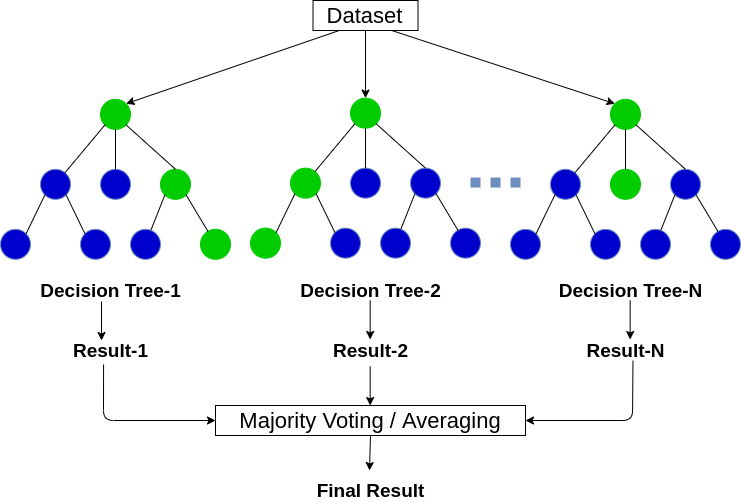

**Working of Random Forest Algorithm**

Before understanding the working of the random forest we must look into the ensemble technique. Ensemble simply means combining multiple models. Thus a collection of models is used to make predictions rather than an individual model.

**Ensemble uses two types of methods**

1. Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

2. Boosting– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST

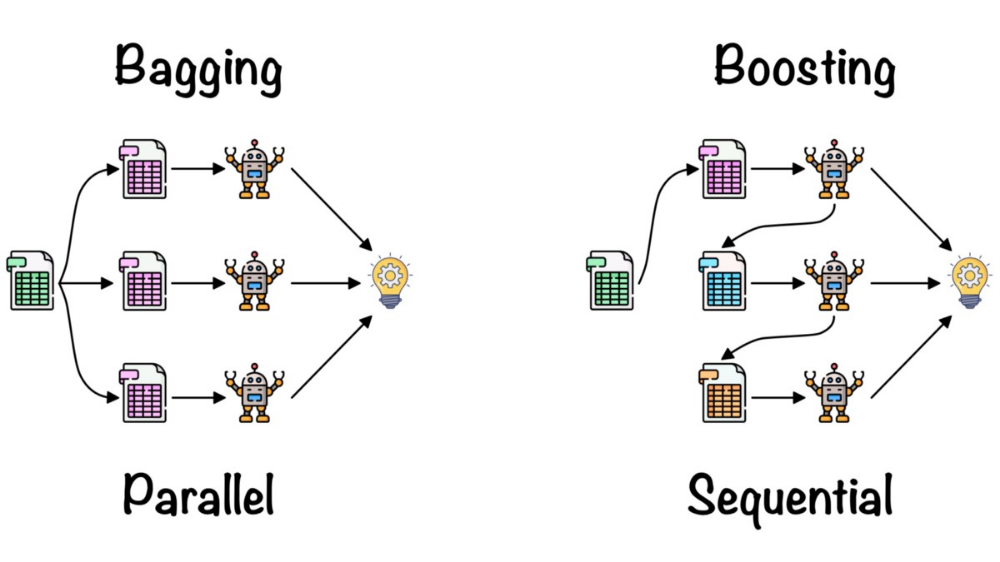

**Steps involved in random forest algorithm**

* Step 1: In Random forest n number of random records are taken from the data set having k number of records.

* Step 2: Individual decision trees are constructed for each sample.

* Step 3: Each decision tree will generate an output.

* Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

**Important Features of Random Forest**

1. Diversity- Not all attributes/variables/features are considered while making an individual tree, each tree is different.

2. Immune to the curse of dimensionality- Since each tree does not consider all the features, the feature space is reduced.

3. Parallelization-Each tree is created independently out of different data and attributes. This means that we can make full use of the CPU to build random forests.

4.  Train-Test split- In a random forest we don’t have to segregate the data for train and test as there will always be 30% of the data which is not seen by the decision tree.

5.  Stability- Stability arises because the result is based on majority voting/ averaging.

**Important Hyperparameters**

Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

***Following hyperparameters increases the predictive power:***

1. ***n_estimators***– number of trees the algorithm builds before averaging the predictions.

2. ***max_features***– maximum number of features random forest considers splitting a node.

3. ***mini_sample_leaf***– determines the minimum number of leaves required to split an internal node.

***Following hyperparameters increases the speed:***

1. ***n_jobs***– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. ***random_state***– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. ***oob_score***– OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples

##**Using Sklearn**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [2]:
!kaggle datasets download -d volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/738k [00:00<?, ?B/s]
100% 738k/738k [00:00<00:00, 45.7MB/s]
Archive:  fraud-detection-bank-dataset-20k-records-binary.zip
replace fraud_detection_bank_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fraud_detection_bank_dataset.csv  


In [3]:
data=pd.read_csv('fraud_detection_bank_dataset.csv')
data

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0


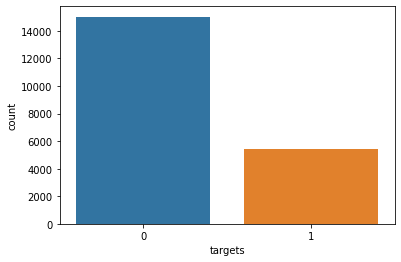

In [6]:
# Countplot
sns.countplot(x='targets',data=data,orient="h")

{'boxes': [<matplotlib.patches.PathPatch at 0x7f49bf51f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f49bf52ef90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f49bf4b9fd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f49bf4b9a50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f49bf51f810>,
  <matplotlib.lines.Line2D at 0x7f49bf45f710>]}

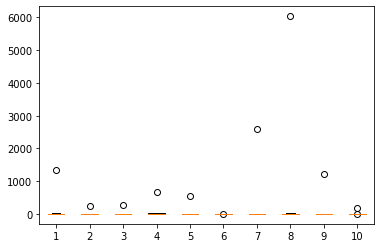

In [7]:
# Boxplot
plt.boxplot(data.iloc[0:10,0:10], vert=True, patch_artist=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


In [9]:
data.describe()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,10233.500000,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,5908.746991,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5116.750000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,10233.500000,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,15350.250000,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,20467.000000,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


In [10]:
# Segeggrating X & Y
y=data[['targets']]
x=data.drop(['Unnamed: 0','targets'],axis=1)

x

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
0,9,1354,0,18,0,1,7,9,0,0,...,4,0,0,0,1,1,0,0,0,49
1,0,239,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,55
2,0,260,0,4,0,3,6,0,0,0,...,1,0,0,0,1,1,0,0,0,56
3,17,682,0,1,0,0,8,17,0,0,...,1,0,1,0,1,1,0,0,0,65
4,1,540,0,2,0,1,7,1,0,0,...,1,0,0,0,1,1,0,0,0,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,...,0,0,1,0,0,0,0,1,0,85
20464,0,134,0,2,0,0,6,0,0,0,...,1,0,0,0,0,0,0,0,0,7
20465,4,393,1,1,0,0,-1,4,0,0,...,0,0,1,0,0,0,0,0,0,45
20466,0,10,0,1,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape

(15351, 112)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=10,oob_score=True)
rfc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=10, oob_score=True)

In [14]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
# Calculating the F1 Score
from sklearn.metrics import f1_score
s=f1_score(y_pred,y_test)
s

0.829485621709194

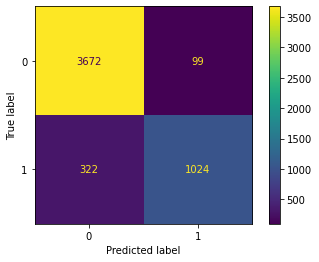

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= rfc.classes_)
disp.plot()